In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()
rcParams['figure.figsize'] = 10, 6
lbl = LabelEncoder()


%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
main = pd.read_csv('bank-additional-full.csv',sep= ';')

In [3]:
main.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
main[main['y'] == 'yes'].shape[0],main[main['y'] == 'no'].shape[0]

(4640, 36548)

In [5]:
main.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
def Viz(s):
    if main[s].dtype!= 'O':
        age_target_yes = main[(main[s] > 0) & (main['y'] == 'yes')]
        age_target_no = main[(main[s] > 0) & (main['y'] == 'no')]
        plt.figure(figsize=(10, 6))
        sns.distplot(age_target_yes[s], bins=25, color='b')
        sns.distplot(age_target_no[s], bins=25, color='g')
        plt.show()
    else:
        plt.figure(figsize=(16, 8))
        tmp = pd.crosstab(main[s], main['y'], normalize='index') * 100
        tmp = tmp.reset_index()
        plt.subplot(221)
        g = sns.countplot(x=s, data=main, order=list(tmp[s].values))
        for p in g.patches:
            height = p.get_height()
            g.text(p.get_x()+p.get_width()/2.,
            height + 3, '{:1.2f}%'.format(height/main.shape[0]*100),
            ha="center",fontsize=14) 
    
        plt.xticks(rotation=45)
        plt.subplot(222)
        g1 = sns.countplot(x=s, hue='y', data=main,order=list(tmp[s].values))
        plt.subplots_adjust(hspace = 0.6, top = 1.4)
        plt.xticks(rotation=45)
        plt.show()

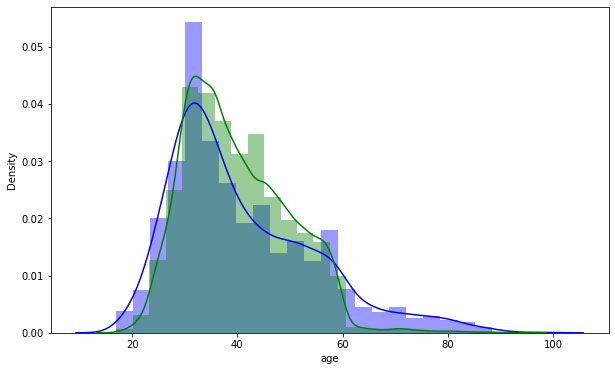

In [7]:
Viz('age')

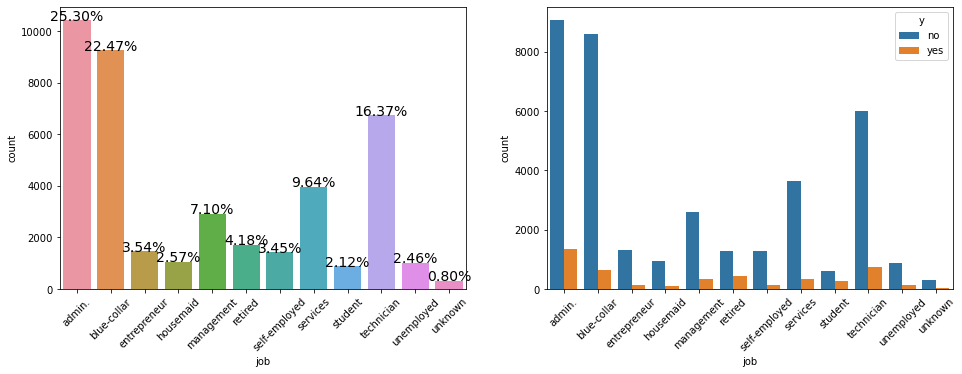

In [8]:
Viz('job')

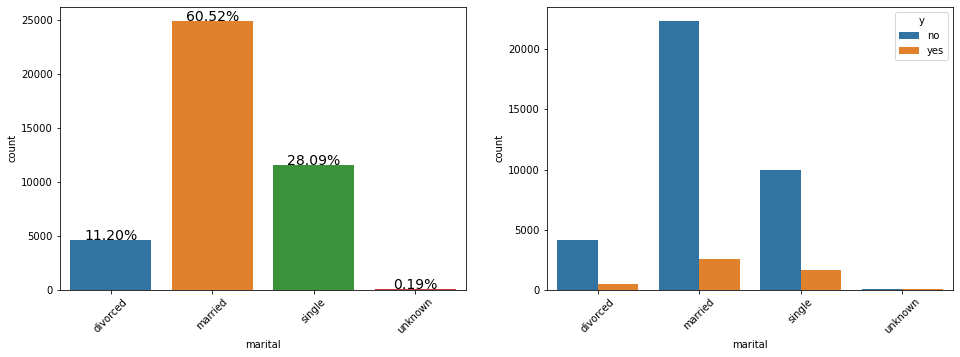

In [9]:
Viz('marital')

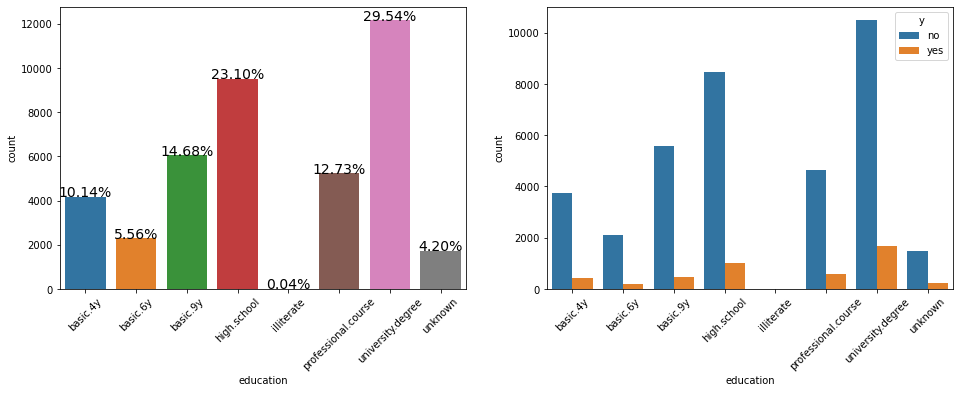

In [10]:
Viz('education')

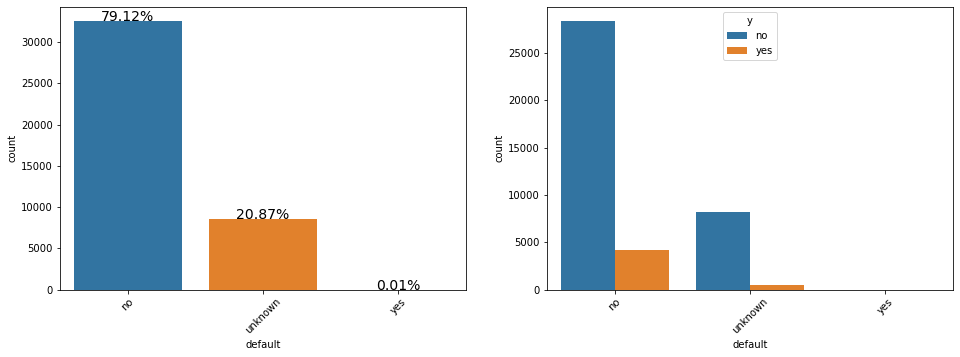

In [11]:
Viz('default')

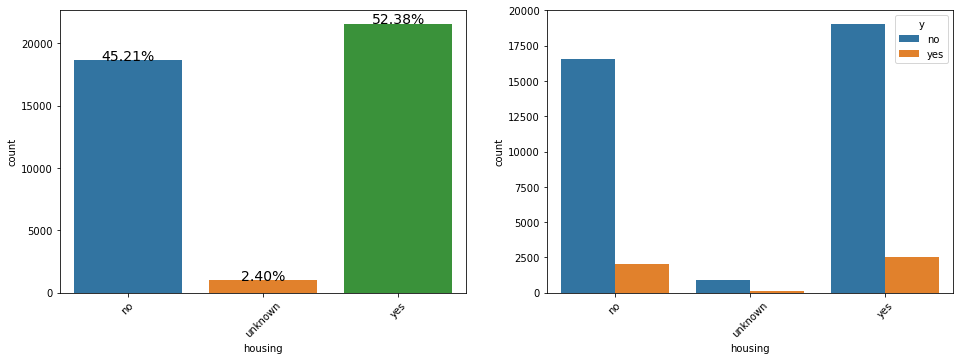

In [12]:
Viz('housing')

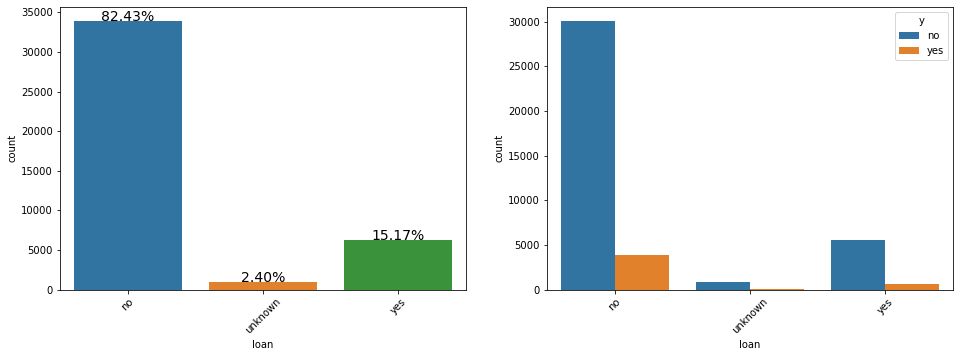

In [13]:
Viz( 'loan')

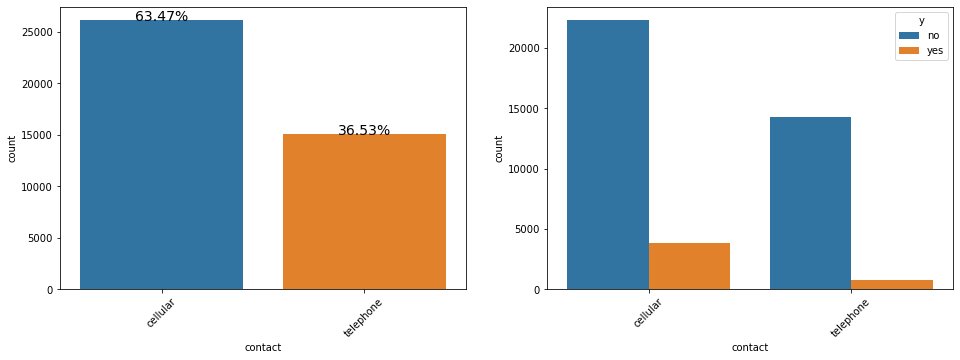

In [14]:
Viz('contact')

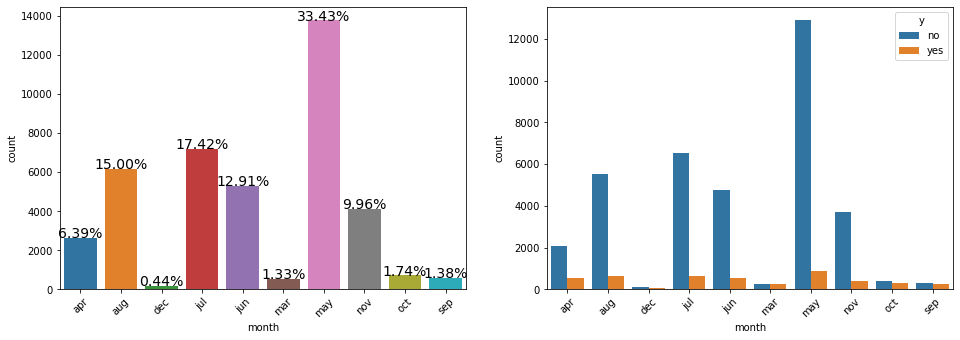

In [15]:
Viz('month')

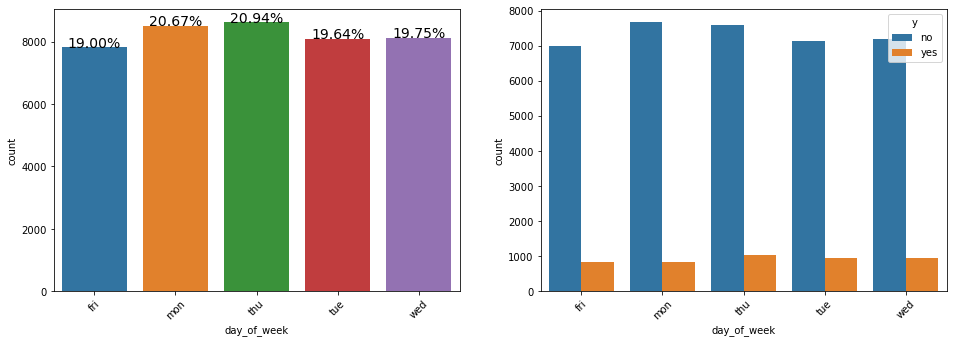

In [16]:
Viz('day_of_week')

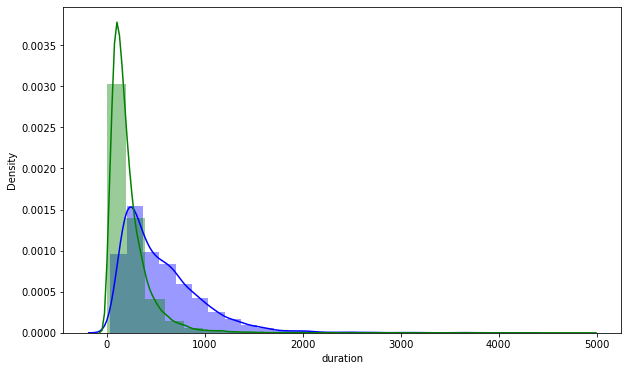

In [17]:
Viz('duration')

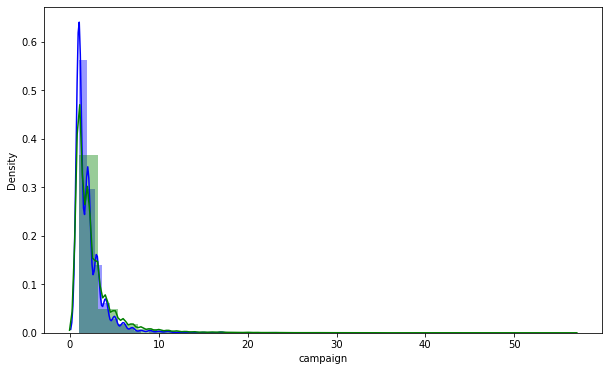

In [18]:
Viz('campaign')

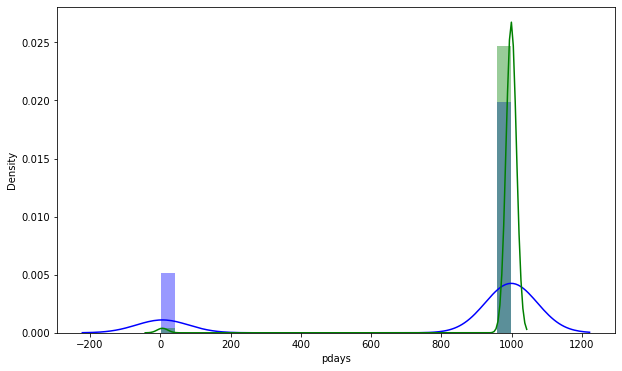

In [19]:
Viz('pdays')

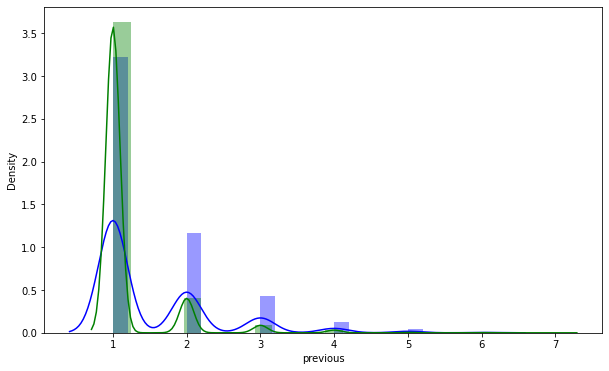

In [20]:
Viz('previous')

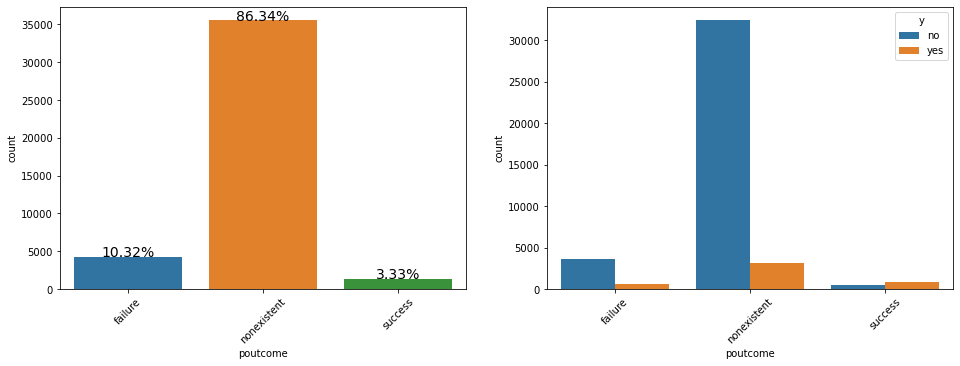

In [21]:
Viz('poutcome')

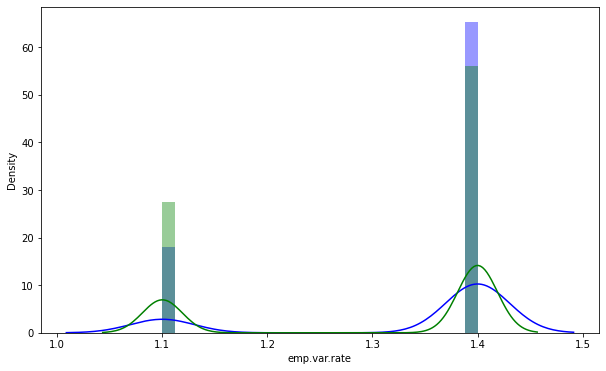

In [22]:
Viz('emp.var.rate')

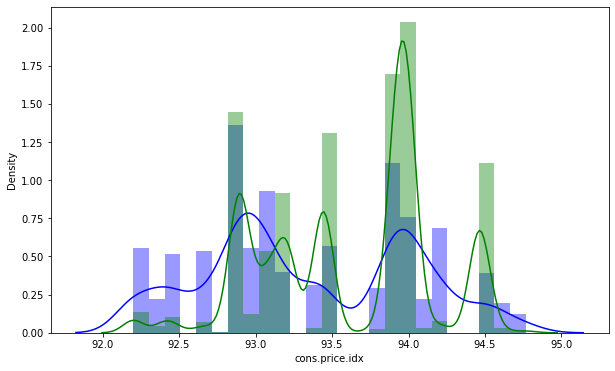

In [23]:
Viz('cons.price.idx')

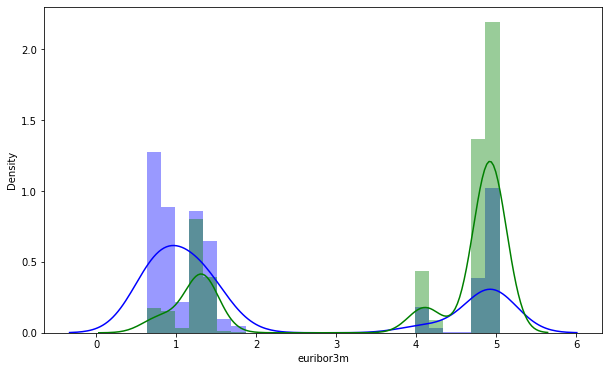

In [24]:
Viz('euribor3m')

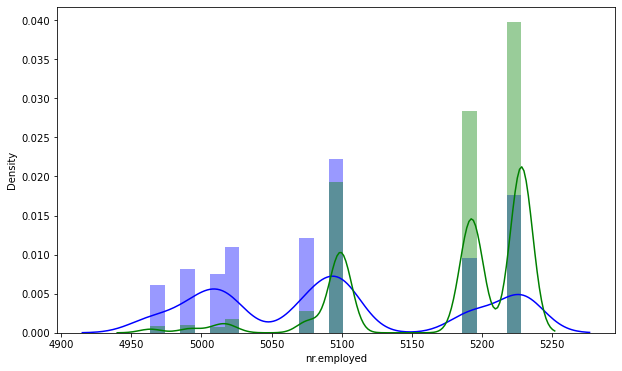

In [25]:
Viz('nr.employed')

In [26]:
df = main.copy()
df['poutcome']=  df['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3})
df['housing'] = df['housing'].map({'no':1, 'yes':2})
df['loan'] = df['loan'].map({'no':1, 'yes':2})
df['default'] = df['default'].map({'no':1, 'yes':2})
df['job'] = df['job'].map({'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9,
       'entrepreneur':10, 'student':11})
df["marital"] = df["marital"].astype('category')
df["marital"] = df["marital"].cat.codes
df["education"] = df["education"].astype('category')
df["education"] = df["education"].cat.codes
df['y'] = df['y'].map({'no':0, 'yes':1})
d = {range(1, 10): 1, range(10, 20): 2, range(20, 1000): 0}
df['pdays'] = df['pdays'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
d = {range(1, 60): 1, range(60, 200): 2, range(200, 600): 3, range(600, 1000): 4,range(1000, 5000): 5}
df['duration'] = df['duration'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

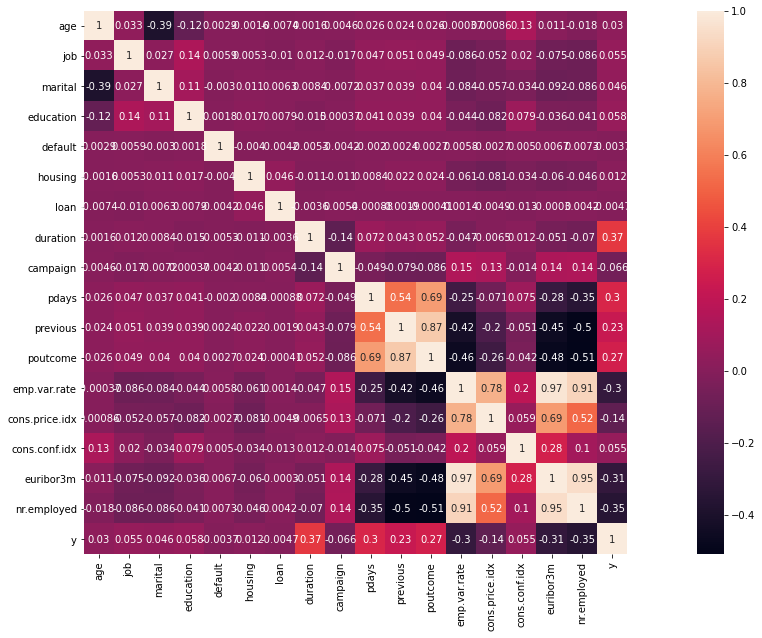

In [27]:
cor=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(cor,vmax=1, square=True,annot=True)
plt.show()

In [28]:
def related(a,b):
    plt.figure(figsize=(10, 6))
    sns.boxenplot(x=a, y=b, hue='y', data=df )
    plt.xticks(rotation=45)
    plt.show()

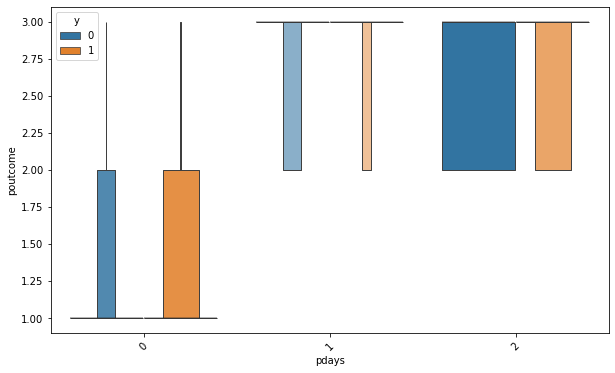

In [29]:
related('pdays','poutcome')

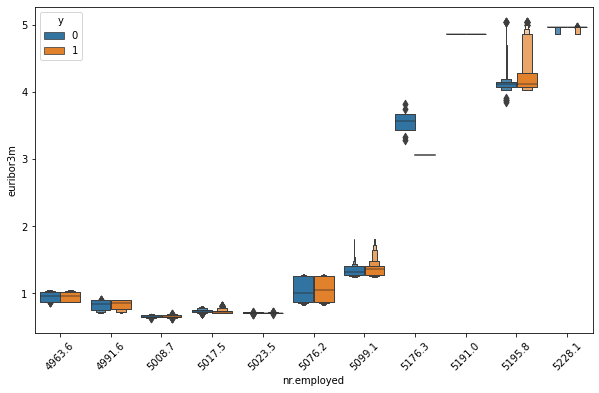

In [30]:
related('nr.employed','euribor3m')